In [1]:
from autumn.core.project import get_project
from matplotlib import pyplot
from autumn.core.plots.utils import REF_DATE
# from autumn.calibration.targets import get_target_series
import pandas as pd
from autumn.core.utils.display import pretty_print
import matplotlib.pyplot as plt
import datetime

In [2]:
from autumn.core.runs import ManagedRun

In [3]:
run_id = "sm_sir/ho_chi_minh_city/1655154801/397fc0f"
mr = ManagedRun(run_id)

In [4]:
pbi = mr.powerbi.get_db()

In [5]:
pbi_do = pbi.get_derived_outputs()

In [6]:
project = get_project("sm_sir", "ho_chi_minh_city")

In [7]:
assert (project.param_set.baseline.to_dict() == mr.calibration.get_params())

In [8]:
# run baseline model
model_0 = project.run_baseline_model(project.param_set.baseline.update(mr.calibration.get_mle_params(),calibration_format=True))
derived_df = model_0.get_derived_outputs_df()

<AxesSubplot:>

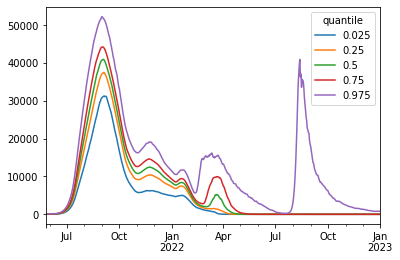

In [9]:
pbi.get_uncertainty()['hospital_occupancy'][4].plot()

<AxesSubplot:>

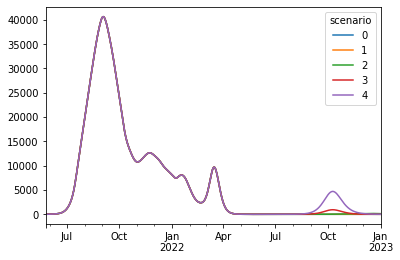

In [10]:
pbi_do['hospital_occupancy'].plot()

<AxesSubplot:>

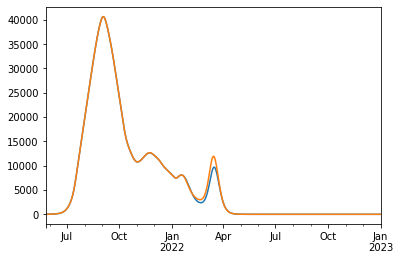

In [11]:
pbi_do['hospital_occupancy'][0].plot()
derived_df['hospital_occupancy'].plot()

In [4]:
# run scenarios
start_times = [
    sc_params.to_dict()["time"]["start"] for sc_params in project.param_set.scenarios
]
sc_models = project.run_scenario_models(model_0, project.param_set.scenarios, start_times=start_times)
derived_dfs = [m.get_derived_outputs_df() for m in sc_models]

In [5]:
len(derived_dfs)

4

In [6]:
print(project.param_set.scenarios[1]["additional_immunity"])
print(project.param_set.scenarios[2]["additional_immunity"])

None
None


In [7]:
# define scenario names in compliance with policy brief
scenario_names = {
    0: "Hypertransmissible VoC",
    1: "Hypertransmissible, partially immune-escape VoC",
    2: "Hypertransmissible, totally immune-escape VoC",
    3: "Hypertransmissible, totally immune-escape, severe VoC"
}

# derived output figure title lookup
# title_lookup = {
#     "cdr": "Case Detection Rate (in ratio)",
#     "hospital_occupancy": "Total actually occupied hospital beds",
#     "icu_occupancy": "Total actuall occupied beds for critical patients",
#     "incidence": "Daily actual number of COVID-19 cases",
#     "infection_deaths": "Daily number of COVID-19-specific fatalities",
#     "notifications": "Daily number of registered cases"
# }

In [8]:
def plot_all_outputs_chosen_scenarios(scenarios_to_plot, name_to_save):
    plot_left_date = datetime.date(2021, 5, 25)
    plot_right_date = datetime.date(2023, 1, 1)
    start_date_scenarios = datetime.date(2022, 7, 1)
    
    outputs_to_plot = ("hospital_occupancy", "icu_occupancy")
    
    fig, axes = plt.subplots(1, 2, figsize = (21, 7), sharex="all")
    fig.set_facecolor("w")
    for i_ax, axis in enumerate(axes.reshape(-1)):
        print(i_ax)
        axis.axvline(x=start_date_scenarios, linestyle="--", color="k")
        plt.text(start_date_scenarios, 0.95, ' 2022-06-01', transform=axis.get_xaxis_transform(), fontsize=12)
        # plot baseline before start date of scenarios
        result_df = derived_dfs[0][outputs_to_plot[i_ax]][plot_left_date:start_date_scenarios]
        indices = result_df.index
        axis.plot(indices, result_df)
        for scenario in scenarios_to_plot:
            results_df = derived_dfs[scenario][outputs_to_plot[i_ax]][plot_left_date:plot_right_date]
            indices = results_df.index
            axis.plot(indices, results_df, label = scenario_names[scenario], linewidth=2)
        
        axis.tick_params(axis="x", labelrotation=45)
        axis.set_xlim(left=plot_left_date)
        axis.set_title(title_lookup[outputs_to_plot[i_ax]], fontsize=20)
        axis.legend()
    
    fig.suptitle(name_to_save, fontsize=25)
    # fig.savefig(f"./HCMC_scens_{scenarios_to_plot}_all_outputs.png")

In [9]:
derived_df["notifications"]

2021-05-25    0.000000e+00
2021-05-26    4.549066e+00
2021-05-27    3.809064e+01
2021-05-28    7.140003e+01
2021-05-29    6.845328e+01
                  ...     
2022-12-28    1.022026e-12
2022-12-29    9.143458e-13
2022-12-30    8.180138e-13
2022-12-31    7.318338e-13
2023-01-01    6.547356e-13
Name: notifications, Length: 587, dtype: float64

In [10]:
derived_dfs[0]["notifications"]

2021-05-25     0.000000
2021-05-26     4.549066
2021-05-27    38.090637
2021-05-28    71.400029
2021-05-29    68.453281
                ...    
2022-12-28     0.823883
2022-12-29     0.821703
2022-12-30     0.819530
2022-12-31     0.817364
2023-01-01     0.815210
Name: notifications, Length: 587, dtype: float64

In [18]:
pbi = mr.powerbi.get_db()

KeyboardInterrupt: 

In [17]:
pbi

name,clinical_stratification.icu_prop,clinical_stratification.props.hospital.multiplier,contact_rate,infection_fatality.multiplier,infectious_seed,mobility.microdistancing.behaviour.parameters.max_effect,sojourn.compartment_periods_calculated.active.total_period,sojourn.compartment_periods_calculated.exposed.total_period,testing_to_detection.assumed_cdr_parameter
urun,,,,,,,,,
00_000000,0.168690,0.309291,0.232433,0.816856,5.535726,0.350328,7.326850,6.246362,0.000718
00_000001,0.162622,0.341802,0.230588,0.867022,5.539757,0.353816,7.505365,6.244965,0.000722
00_000002,0.159296,0.342914,0.231563,0.855890,5.550851,0.350842,7.469592,5.962805,0.000723
00_000003,0.155161,0.322781,0.232142,0.891693,5.480440,0.354050,7.138607,6.294420,0.000710
00_000004,0.154890,0.320033,0.232966,0.865822,5.523215,0.350338,7.194863,6.421245,0.000691
...,...,...,...,...,...,...,...,...,...
06_003623,0.168332,0.307326,0.218089,0.819742,9.491064,0.381322,7.516335,6.007887,0.000530
06_003631,0.161353,0.331476,0.220775,0.738486,5.588527,0.326868,8.143812,6.101456,0.000547
06_003632,0.164450,0.322657,0.206896,0.723801,7.972937,0.322037,8.444672,5.691632,0.000566


0


NameError: name 'title_lookup' is not defined

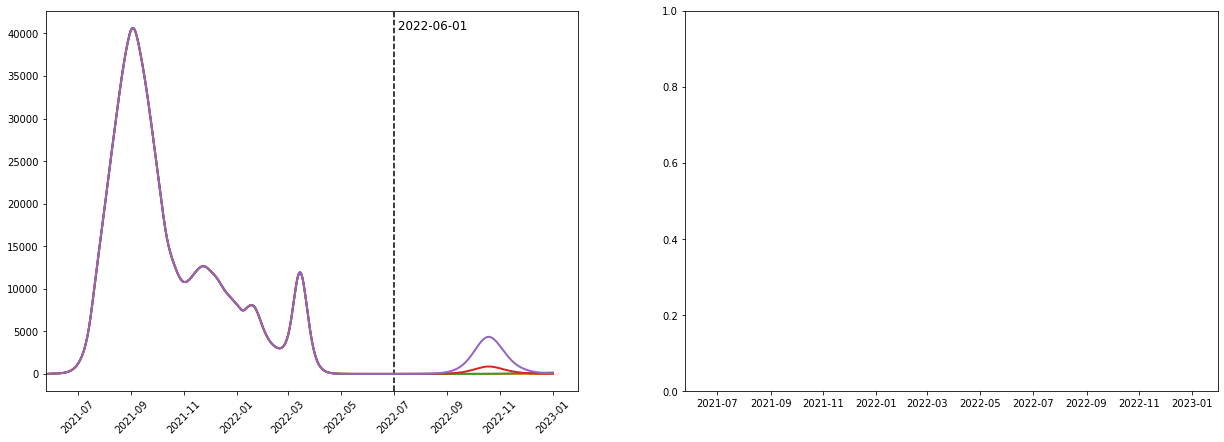

In [11]:
plot_all_outputs_chosen_scenarios([0, 1, 2, 3], "Plotting of all scenarios")

0


NameError: name 'title_lookup' is not defined

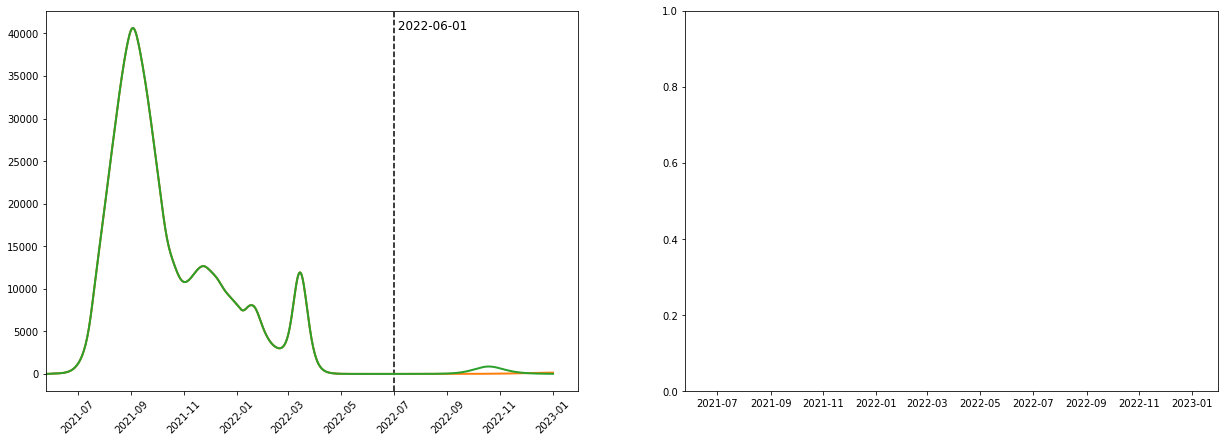

In [12]:
# plot outputs of scenarios without and with the emergence of Omicron VoC, respectively
# plot_all_outputs_chosen_scenarios([0, 2, 4, 6], 
#     "HCMC modelling results for all outputs of scenarios when Omicron does not emerge")
# plot_all_outputs_chosen_scenarios([1, 3, 5, 7], 
#     "HCMC modelling results for all outputs of scenarios when Omicron emerges on 01st Jan 2022")
plot_all_outputs_chosen_scenarios([1, 2], "Scenarios 2 and 3")

In [ ]:
# # note that scenarios are numbered from 0 for baseline, and 1, 2, 3, etc. onwards
# start_date_scenarios = datetime.date(2021, 6, 1)
# end_date_scenarios = datetime.date(2022, 11, 1)

# def print_epi_info(scenario):
#     print("From {} to {}, for {}:".format(start_date_scenarios, end_date_scenarios, scenario_names[scenario]))
#     print("\b The necessary number of hospital beds needed to fulfill the occupancy is {}."
#           .format(round(max(derived_dfs[scenario]["hospital_occupancy"][start_date_scenarios:end_date_scenarios]))))
#     print("\b The necessary number of ICU beds needed to fulfill the occupancy is {}."
#           .format(round(max(derived_dfs[scenario]["icu_occupancy"][start_date_scenarios:end_date_scenarios]))))
#     print("\b The maximum number of incidence cases (including asymptomatic and undetected cases) is {}."
#           .format(round(max(derived_dfs[scenario]["incidence"][start_date_scenarios:end_date_scenarios]))))
#     print("\b The maximum number of daily COVID-19-specific fatalities is {}."
#           .format(round(max(derived_dfs[scenario]["infection_deaths"][start_date_scenarios:end_date_scenarios]))))
#     print("\b The maximum number of daily COVID-19 registered cases is {}."
#           .format(round(max(derived_dfs[scenario]["notifications"][start_date_scenarios:end_date_scenarios]))))
#     print("\b The total number of daily COVID-19 registered cases is {}."
#           .format(round(sum(derived_dfs[scenario]["notifications"][start_date_scenarios:end_date_scenarios]))))

In [ ]:
# for i in range(0, 3):
#     print_epi_info(i)